# Online Payments Fraud Detection Machine Learning

In [2]:
# Load Libraries
import pandas as pd
import numpy as np


## Load Dataset

In [3]:
# Kaggle dataset Online Payments Fraud Detection
df = pd.read_csv("/content/onlinefraud.csv")


In [4]:
# Number of Rows and Columns
df.shape

(6362620, 11)

In [5]:
# Display first 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# List Columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Data Preparation

In [8]:
# Checking values for isFlaggedFraud
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [9]:
# Checking for nulls
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [10]:
# checking values for type
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


## Data Visualization

In [11]:
# Load Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
# Visualize Categories for Transaction Type
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

figure = px.pie(df,
                values=quantity,
                names = transactions, hole=0.5,
                title = "Distribution of Transaction Type")
figure.show()

In [13]:
# Transaction type breakdown by isFraud flag
df.groupby('isFraud')['type'].value_counts()
#ax.bar_label(ax.containers[0])
#plt.show()

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
Name: count, dtype: int64

The fraud transactions are evenly split between the cash_out and transfer payment transaction types.  The other transaction types do not have any fraud transactions.

In [14]:
# Group data by isFraud flag and Transaction Type
df_pymt = df.groupby(['isFraud', 'type']).agg(trans_cnt = ('amount', 'count'),
trans_amt = ('amount', 'sum')).astype('int64').reset_index()


In [15]:
# Make isFraud a categorical type
df_pymt.isFraud = df_pymt.isFraud.map({0: "Not Fraud", 1: "Fraud",})
df_pymt

,isFraud,type,trans_cnt,trans_amt
0,Not Fraud,CASH_IN,1399284,236367391912
1,Not Fraud,CASH_OUT,2233384,388423792980
2,Not Fraud,DEBIT,41432,227199221
3,Not Fraud,PAYMENT,2151495,28093371138
4,Not Fraud,TRANSFER,528812,479224774079
5,Fraud,CASH_OUT,4116,5989202243
6,Fraud,TRANSFER,4097,6067213184


In [16]:
# Pie Chart:  Fraud vs Not Fraud
import plotly.express as px
figure = px.pie(df_pymt,
                values='trans_amt',
                names = 'isFraud', hole = 0.5,
                title = "Fraud vs Not Fraud ",
                color='isFraud',
             color_discrete_map={'Not Fraud':'green',
                                 'Fraud':'red',
                                 })


figure.show()

1.05% of transactions dollars are fraud related.

In [55]:
df.groupby('isFraud')['amount'].mean().astype('int64')

,amount
isFraud,
0,178197
1,1467967


The average fraud transaction amount is $1,467,967.

In [58]:
# Total transaction amount by isFraud
df.groupby('isFraud')['amount'].sum().astype('int64')

,amount
isFraud,
0,1132336529331
1,12056415427


In [59]:
# Total transaction dollar amount
df.amount.sum()

1144392944759.77

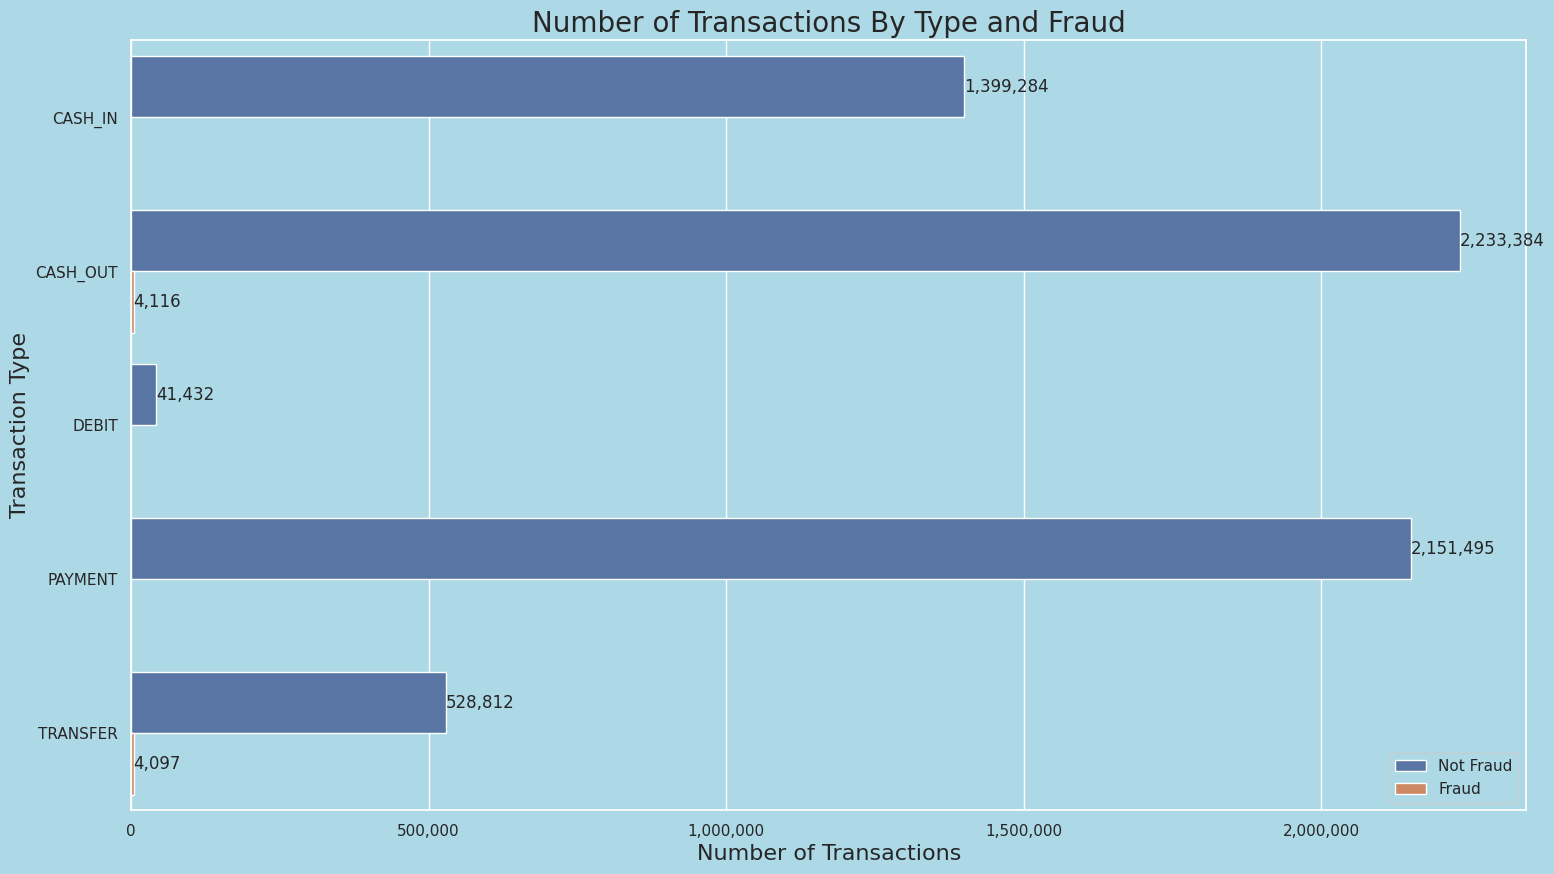

In [69]:
import matplotlib.ticker as ticker

# Set plot size
plt.figure(figsize=(18, 10))

#define seaborn background colors
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

# define plot
ax = sns.barplot(x='trans_cnt', y='type', hue='isFraud',
                 data=df_pymt)

# format ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x) ))

# data labels
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
ax.bar_label(ax.containers[1], fmt='{:,.0f}')

# titles
ax.set_xlabel("Number of Transactions", fontsize=16)
ax.set_ylabel("Transaction Type", fontsize=16)
ax.set_title("Number of Transactions By Type and Fraud", fontsize=20)

# legend
plt.legend(loc='lower right')

# show plot
plt.show()

#Save to png
transc_fig = ax.get_figure()
transc_fig.savefig('NumberTrans.png')

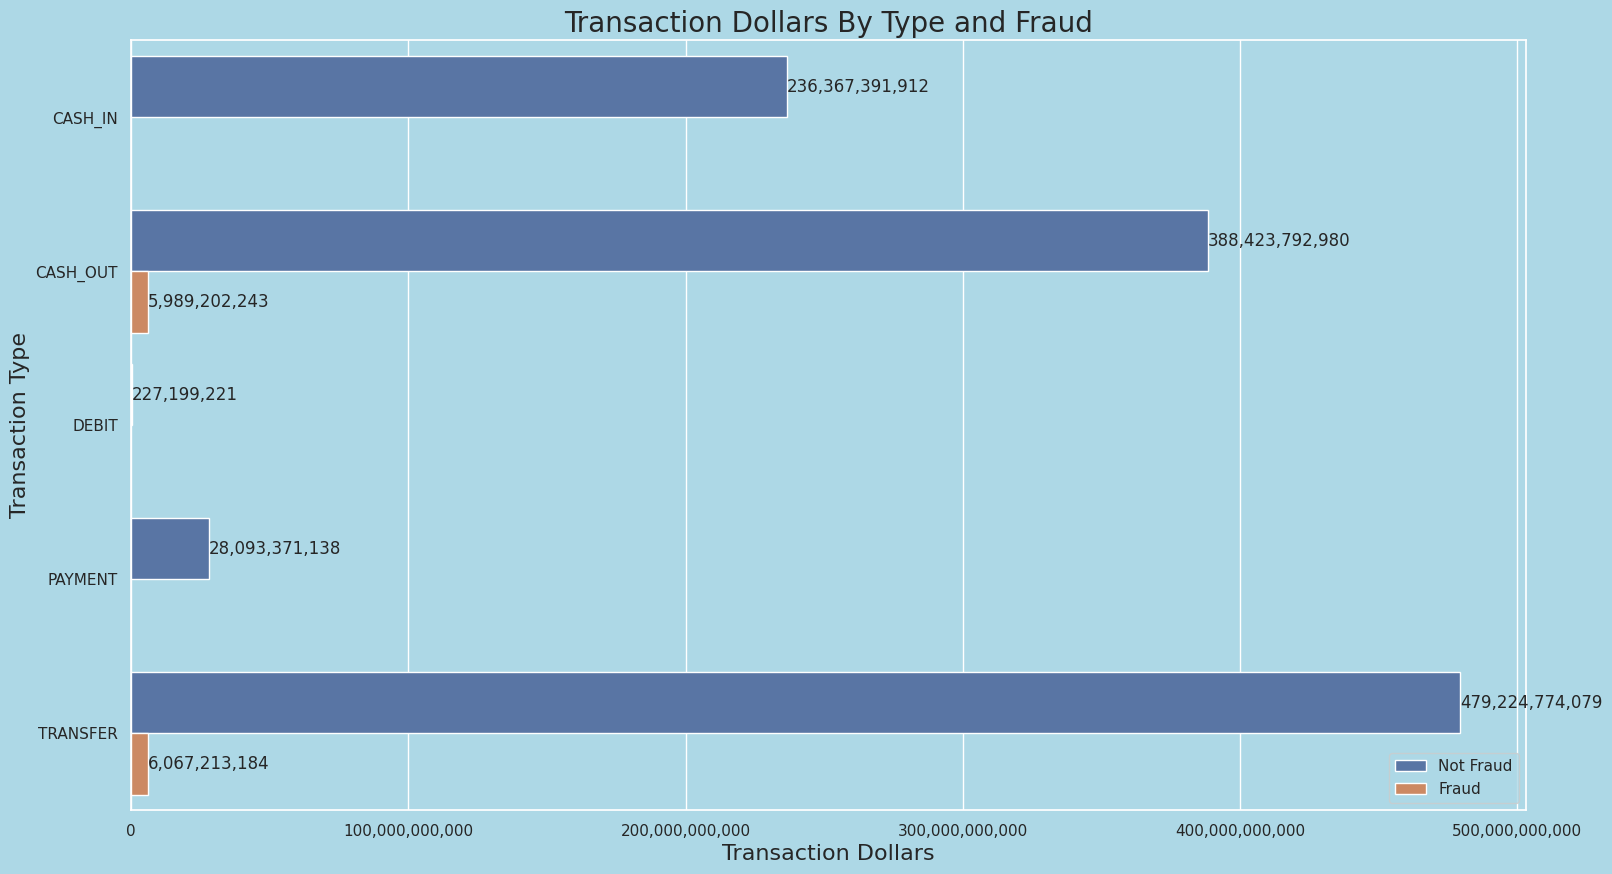

In [70]:
plt.figure(figsize=(18, 10))
#define seaborn background colors
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

#define plot
ax = sns.barplot(x='trans_amt', y='type', hue='isFraud',
                 data=df_pymt)

# change ticker display to thousands
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# data labels
ax.bar_label(ax.containers[0], fmt='{:,.0f}')
ax.bar_label(ax.containers[1], fmt='{:,.0f}')

# titles
ax.set_xlabel("Transaction Dollars", fontsize=16)
ax.set_ylabel("Transaction Type", fontsize=16)
ax.set_title("Transaction Dollars By Type and Fraud", fontsize=20)

# legend
plt.legend(loc='lower right')

# show plot
plt.show()

# Save to png
transd_fig = ax.get_figure()
transd_fig.savefig('TransDollars.png')

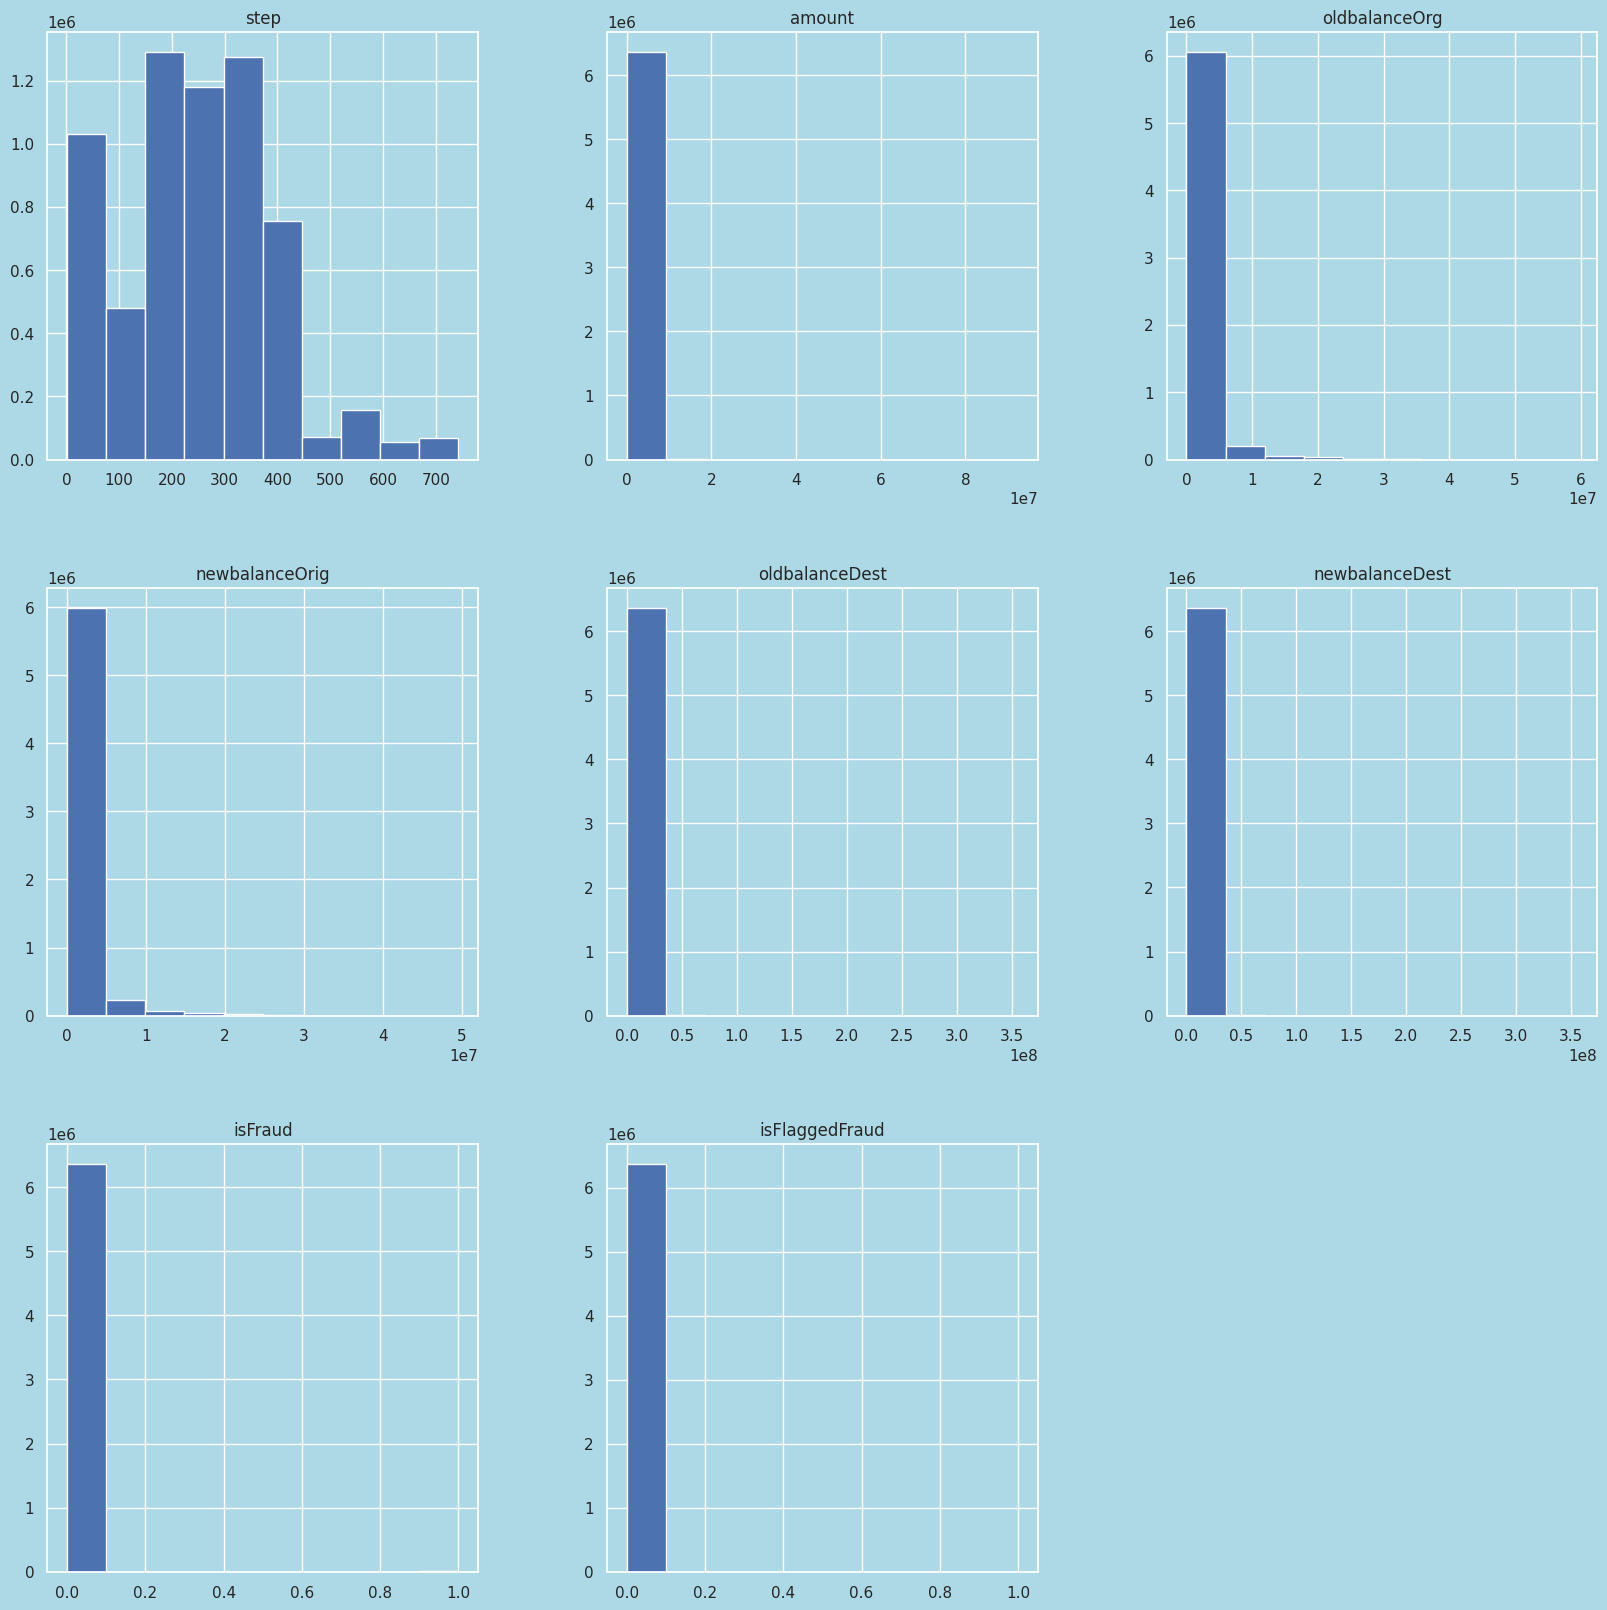

In [63]:
# Histogram for numeric values

df.hist(figsize=(20,20))
plt.show()

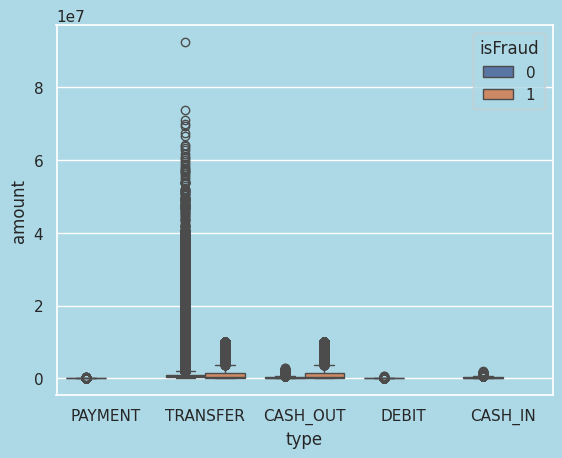

In [64]:
sns.boxplot(x=df['type'], y=df['amount'], hue=df['isFraud'])
plt.show()

The transfer and cash_out transaction types have a alot of outliers.

In [65]:
# Correlation between features and target
correlation = df.corr(numeric_only=True)
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


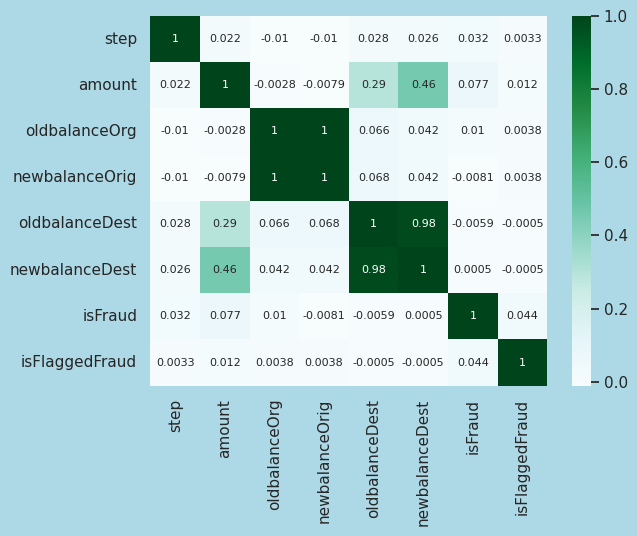

In [66]:
# Visualize Correlation

sns.heatmap(round(df.corr(numeric_only=True),4), annot=True, cmap="BuGn",annot_kws={'size':8})
plt.show()

## Encoding and Correlation

In [67]:
# Encode categorical feature
df= pd.get_dummies(df,columns=['type'],prefix=['type'],dtype=int)

In [71]:
# Display rows after encoding
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [72]:
# Drop columns that are not needed
df = df.drop(["step","nameOrig", "nameDest", "oldbalanceDest", "newbalanceDest", "isFlaggedFraud"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   isFraud         int64  
 4   type_CASH_IN    int64  
 5   type_CASH_OUT   int64  
 6   type_DEBIT      int64  
 7   type_PAYMENT    int64  
 8   type_TRANSFER   int64  
dtypes: float64(3), int64(6)
memory usage: 436.9 MB


## Model Building

In [73]:
# Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Split Dataset into Features and Target

In [82]:
# Split in features (X) and target (y)
X = df.drop("isFraud",axis=1)

print(X.shape)


(6362620, 8)


In [83]:
y = df['isFraud']
print(y.shape)

(6362620,)


In [84]:
y.value_counts()

,count
isFraud,
0,6354407
1,8213


### Imbalance

In [85]:
 # Address the imbalance between Fraud and Not Fraud
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(sampling_strategy=0.1)
X_ros,y_ros = ros.fit_resample(X,y)

In [86]:
 y_ros.value_counts()

,count
isFraud,
0,82130
1,8213


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros, test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63240, 8)
(27103, 8)
(63240,)
(27103,)


###Hyperparameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
grid_params = {
'criterion': ['gini', 'entropy'],
'max_depth': [3,5,7,10],
'min_samples_split': range(2,10,1),
'min_samples_leaf': range(2,10,1)
}

grid_search = GridSearchCV(model, grid_params, cv=5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train, y_train)
print('Best Score: %s' % grid_result.best_score_)
print('Best Hyperparameters: %s' % grid_result.best_params_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
Best Score: 0.9909234661606579
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 9}


### Model

In [89]:
# model
model  = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 3, min_samples_split= 9, random_state=42, class_weight='balanced')

# fit
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)




### Accuracy

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     24655
           1       0.93      0.99      0.96      2448

    accuracy                           0.99     27103
   macro avg       0.97      0.99      0.98     27103
weighted avg       0.99      0.99      0.99     27103



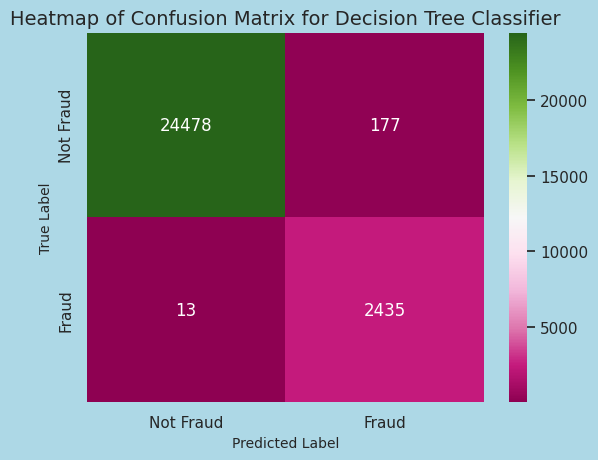

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report for Random Forest")
print(classification_report(y_test, y_pred))
classes = ['Not Fraud', 'Fraud']
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d",cmap="PiYG",xticklabels=classes, yticklabels=classes)
plt.title('Heatmap of Confusion Matrix for Decision Tree Classifier', fontsize = 14)
plt.xlabel('Predicted Label', fontsize = 10) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 10) # y-axis label with fontsize 15
plt.show()

Model achieved 96% for detecting Fraud


### Predictions

In [91]:
X.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [92]:
data=[[63416.52,63416.52,0,0,0,0,0,1]]

p = pd.DataFrame(data,columns=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
p

,amount,oldbalanceOrg,newbalanceOrig,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,63416.52,63416.52,0,0,0,0,0,1


In [93]:
if model.predict(p) == 0:
  print("Not Fraud")
else:
  print("Fraud")

Fraud


In [94]:
print(model.predict_proba(p))

[[0.00256531 0.99743469]]


.0026% - Not Fraud, 99.74% - Fraud

## Save Model


In [95]:
import joblib
# Use the dump() function to save the model
# Compress file due to size
joblib.dump(model,'onlinepymt_model_jl.sav.bz2',compress=('bz2',2))

['onlinepymt_model_jl.sav.bz2']

## Load Saved Model

In [96]:
loaded_model = joblib.load('onlinepymt_model_jl.sav.bz2')


In [99]:

if loaded_model.predict(p) == 0:
  print("Not Fraud")
else:
  print("Fraud")

Fraud


In [102]:
print(loaded_model.predict_proba(p))

[[0.00256531 0.99743469]]


## Results

Results:
- The online payment data had an imbalance of 6 million rows (Not Fraud) to 8213
rows (Fraud)
- Cash Out and Transfer were the only transactions with fraud transactions.  Cash In, Debit, and Payment did not have any fraud transactions.
- Handled the imbalance by using RandomUnderSampling to reduce the Not Fraud rows.
- Trained model using 82130 Not Fraud rows and 8213 Fraud rows.  90,343 total rows.
- Used hyperparameter tuning to determine the best parameters for the Decision Tree model
- The Decision Tree model achieved 96% accuracy for detecting Fraud for Cash Out and Transfer transactions.





## Limitations


Limitations:
- The dataset only contains fraud transactions for the CASH_OUT and TRANSFER transaction types.  Therefore, the model is not trained for fraud transactions in the CASH_IN, DEBIT, PAYMENT transaction types.